This dataset has funding information of the Indian startups from January 2015 to August 2017.
Feature Details :
SNo - Serial number.
Date - Date of funding in format DD/MM/YYYY.
StartupName - Name of the startup which got funded.
IndustryVertical - Industry to which the startup belongs.
SubVertical - Sub-category of the industry type.
CityLocation - City which the startup is based out of.
InvestorsName - Name of the investors involved in the funding round.
InvestmentType - Either Private Equity or Seed Funding.
AmountInUSD - Funding Amount in USD.
Remarks - Other information, if any.
Insights -
Find out what type of startups are getting funded in the last few years?
Who are the important investors?
What are the hot fields that get a lot of funding these days?

# 
Problem Statement :
Check the trend of investments over the years. To check the trend, find -
Total number of fundings done in each year.
Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.
Print year-wise total number of fundings also. Print years in ascending order.
Note :
There is some error in the 'Date' feature. Make sure to handle that.

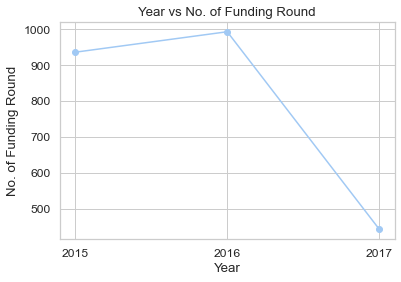

2015 936
2016 993
2017 443


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
df_start=pd.read_csv('startup_funding.csv',encoding='utf-8')
df_start['Date'].replace("12/05.2015","12/05/2015",inplace=True)
df_start['Date'].replace("13/04.2015","13/04/2015",inplace=True)
df_start['Date'].replace("15/01.2015","15/01/2015",inplace=True)
df_start['Date'].replace("22/01//2015","22/01/2015",inplace=True)
def convertDate(date):
 return date.split('/')[-1]
df_start['Year']=df_start['Date'].apply(convertDate)
year_count=df_start['Year'].value_counts()
year_fund=list(zip(year_count.index,year_count.values))
year_fund=np.array(year_fund,dtype=int)
year_fund=year_fund[year_fund[:,0].argsort()]
year=year_fund[:,0]
funding_round=year_fund[:,1]

sns.set_palette("pastel")
sns.set_context("notebook", font_scale=1.1)
plt.plot(year,funding_round,marker = 'o')
plt.xticks(year)
plt.title('Year vs No. of Funding Round')
plt.xlabel('Year')
plt.ylabel('No. of Funding Round')
plt.show()
for i in range(len(year)):
 print(year[i],funding_round[i])

# Problem Statement 
Find out which cities are generally chosen for starting a startup.
Find top 10 Indian cities which have most number of startups ?
Plot a pie chart and visualise it.
Print the city name and number of startups in that city also.
Note :
Take city name "Delhi" as "New Delhi".
Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".
For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.
Print the city in descending order with respect to the number of startups.

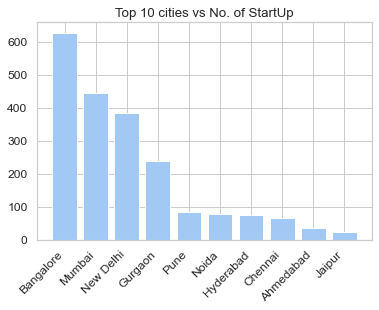

Bangalore 628
Mumbai 446
New Delhi 385
Gurgaon 240
Pune 84
Noida 78
Hyderabad 76
Chennai 66
Ahmedabad 35
Jaipur 25


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_start=pd.read_csv('startup_funding.csv',encoding='utf-8')
df_start['CityLocation'].dropna(inplace=True)
def separateCity(city):
 return city.split('/')[0].strip()
# df_start['CityLocation']=df_start['CityLocation'].apply(separateCity)
df_start['CityLocation'].replace("Delhi","New Delhi",inplace=True)
df_start['CityLocation'].replace("bangalore","Bangalore",inplace=True)
city_number=df_start['CityLocation'].value_counts()[0:10]
city=city_number.index
numCity=city_number.values

sns.set_palette("pastel")
sns.set_context("notebook", font_scale=1.1)
# sns.set(style="whitegrid")
plt.bar(city,numCity)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 cities vs No. of StartUp')
plt.show()

for i in range(len(city)):
    print(city[i],numCity[i])
    

# Problem Statement :
Find out if cities play any role in receiving funding.
Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).
Print the city and percentage with 2 decimal place after rounding off.
Note:
Take city name "Delhi" as "New Delhi".
Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".
For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.
Print the city in descending order with respect to the percentage of funding.

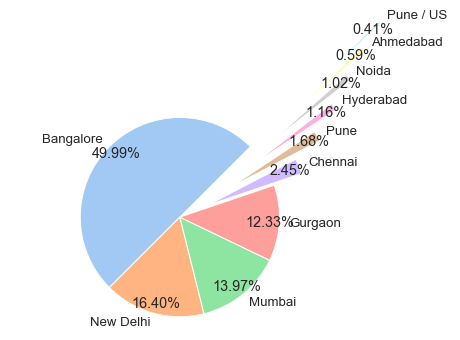

Bangalore 49.99
New Delhi 16.40
Mumbai 13.97
Gurgaon 12.33
Chennai 2.45
Pune 1.68
Hyderabad 1.16
Noida 1.02
Ahmedabad 0.59
Pune / US 0.41


In [89]:
import pandas as pd
import numpy as np
import seaborn as sns

df_start=pd.read_csv('startup_funding.csv',encoding='utf-8')
df_start['CityLocation'].dropna(inplace=True)
def separateCity(city):
 return city.split('/')[0].strip()
# df_start['CityLocation']=df_start['CityLocation'].apply(separateCity)
df_start['CityLocation'].replace("Delhi","New Delhi",inplace=True)
df_start['CityLocation'].replace("bangalore","Bangalore",inplace=True)
## Converting "AmountInUSD" into numeric format
df_start["AmountInUSD"] = df_start["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
df_start["AmountInUSD"] = pd.to_numeric(df_start["AmountInUSD"])
city_amount=df_start.groupby('CityLocation')['AmountInUSD'].sum().sort_values(ascending=False)[0:10]
city=city_amount.index
amountCity=city_amount.values
perAmount=np.true_divide(amountCity, amountCity.sum())*100

fig, ax = plt.subplots(figsize=(8, 6))
explode = (0, 0, 0, 0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8)
sns.set_palette("pastel")
sns.set_context("notebook", font_scale=1.2)
plt.pie(perAmount, labels=city, autopct='%1.2f%%',startangle=45, explode=explode,pctdistance=0.9)

plt.axis('equal')
plt.show()

for i in range(len(city)):
 print(city[i],format(perAmount[i],'.2f'))

# Problem Statement :
There are 4 different type of investments. Find out percentage of amount funded for each investment type.
Plot a pie chart to visualise.
Print the investment type and percentage of amount funded with 2 decimal places after rounding off.
Note :
Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.
Print the investment type in descending order with respect to the percentage of the amount funded.

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


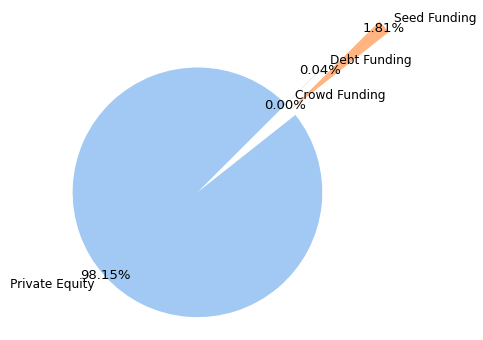

In [74]:
import pandas as pd
import numpy as np
df_start=pd.read_csv('startup_funding.csv',encoding='utf-8')
## Correcting the InvestmentType
df_start['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df_start['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df_start['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
## Converting "AmountInUSD" into numeric format
df_start["AmountInUSD"] = df_start["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
df_start["AmountInUSD"] = pd.to_numeric(df_start["AmountInUSD"])
invest_amount=df_start.groupby('InvestmentType')['AmountInUSD'].sum().sort_values(ascending=False)
invest=invest_amount.index
amountInvest=invest_amount.values
peramount=np.true_divide(amountInvest, amountInvest.sum())*100
for i in range(len(invest)):
 print(invest[i],format(peramount[i],'.2f'))

fig, ax = plt.subplots(figsize=(8, 6))
sns.set_palette("pastel")
sns.set_context("notebook", font_scale=1.1)
explode = (0,  1, 0.4, 0)
plt.pie(peramount, labels=invest, autopct=lambda p: '{:.2f}%'.format(p),startangle=45,explode = explode,pctdistance=0.99)
plt.axis('equal')

plt.show()

# Problem Statement :
Which type of companies got more easily funding. To answer this question, find -
Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)
Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.
Note :
Ecommerce is the right word in IndustryVertical, so correct it.
Print the industry in descending order with respect to the percentage of the amount funded.

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


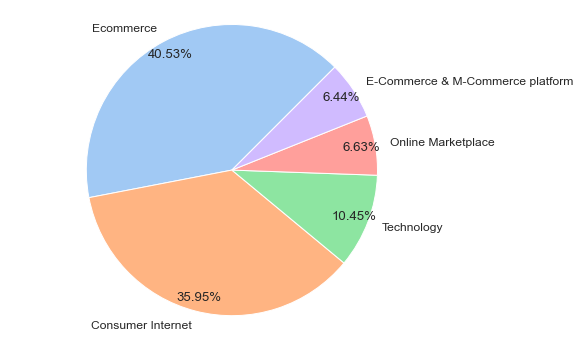

In [92]:
import pandas as pd
import numpy as np
df_start=pd.read_csv('startup_funding.csv',encoding='utf-8')
df_start['IndustryVertical'].replace('eCommerce','Ecommerce',inplace=True)
df_start['IndustryVertical'].replace('ECommerce','Ecommerce',inplace=True)
df_start['IndustryVertical'].replace('ecommerce','Ecommerce',inplace=True)
## Converting "AmountInUSD" into numeric format
df_start["AmountInUSD"] = df_start["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
df_start["AmountInUSD"] = pd.to_numeric(df_start["AmountInUSD"])
industry_amount=df_start.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending=False)[0:5]
industry=industry_amount.index
amountIndustry=industry_amount.values
perIndustry=np.true_divide(amountIndustry, amountIndustry.sum())*100
for i in range(len(industry)):
 print(industry[i],format(perIndustry[i],'.2f'))


fig, ax = plt.subplots(figsize=(8, 6))
sns.set_palette("pastel")
sns.set_context("notebook", font_scale=1.1)
explode = (0,  0, 0, 0,0)
plt.pie(perIndustry, labels=industry, autopct=lambda p: '{:.2f}%'.format(p),startangle=45,explode = explode,pctdistance=0.9)
plt.axis('equal')

plt.show()

# Problem Statement :
Find top 5 startups with most amount of total funding.
Print the startup name in descending order with respect to amount of funding.
Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.

In [25]:
import pandas as pd
import numpy as np
df_start=pd.read_csv('startup_funding.csv',encoding='utf-8')
df_start['StartupName'].replace('Olacabs','Ola',inplace=True)
df_start['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df_start['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df_start['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
df_start['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df_start['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df_start['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df_start['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
## Converting "AmountInUSD" into numeric format
df_start["AmountInUSD"] = df_start["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
df_start["AmountInUSD"] = pd.to_numeric(df_start["AmountInUSD"])
start_fund=df_start.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending=False)[0:5]
startup=start_fund.index
for i in startup:
 print(i)


Paytm
Flipkart
Ola
Snapdeal
Oyo


# Problem Statement :
Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.
Print the startup name in descending order with respect to the number of funding round as integer value.
Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.

Ola 9
Swiggy 7
UrbanClap 6
Oyo 6
Paytm 6


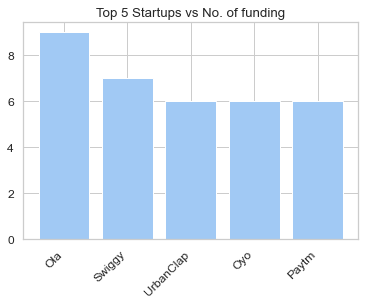

In [91]:
import pandas as pd
df_start=pd.read_csv('startup_funding.csv',encoding='utf-8')
df_start['StartupName'].replace('Olacabs','Ola',inplace=True)
df_start['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df_start['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df_start['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
df_start['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df_start['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df_start['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df_start['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
start_round=df_start['StartupName'].value_counts()[0:5]
startup=start_round.index
fundround=start_round.values
for i in range(len(startup)):
 print(startup[i],fundround[i])

sns.set_palette("pastel")
sns.set_context("notebook", font_scale=1.1)
# sns.set(style="whitegrid")
plt.bar(startup,fundround)
plt.xticks(rotation=45, ha='right')
plt.title('Top 5 Startups vs No. of funding')
plt.show()
